<p><font size="5">  MOOC: Understanding queues</font></p>
<p><font size="5">  Python simulations</p>
<p><font size="5">  Week IV - Part II: Continuous time Markov chains</p></br>

----------------------------

# Introduction

In this second part of the lab, we will consider a variation about the $M/M/1$ queue. In some situations the intensity of clients' arrivals $\lambda$ is not constant. The Markov Modulated Poisson Process (MMPP) is sometimes used, in particular in the case of bursty arrivals. This leads to an $MMPP/M/1$ queue. We will see how this kind of model can be implemented.  

------------

# MMPP/M/1 queue

There are situations where the intensity of clients' arrivals at a system is not constant. In what follows we are going to consider the case of Markov Modulated Poisson Process (MMPP) arrivals. 

A MMPP is a doubly stochastic Poisson process. The intensity $\lambda(t)$ of arrivals is random and evolves according to a continuous time discrete state Markov chain. For example the arrival rate can take two different values $\lambda_0$ and $\lambda_1$ with $\lambda_1 >> \lambda_0$ so that $\lambda(t) = \lambda_1$ will correspond to a burst of arrivals. 

Assuming that the service time is exponentially distributed, $Exp(\mu)$, that there is a single server, an infinite buffer and a FIFO policy, then the queuing model is $MMPP/M/1$.

---

In what follows, we are going to simulate a $MMPP/M/1$ queue where the intensity of arrivals is modelled by a two states, time continuous, Markov chain. We assume that the intensity $\lambda(t)$ of arrivals has two states $\lambda_0$ and $\lambda_1$ ($\lambda(t)\in\{\lambda_0,\lambda_1\}$) and transition rate matrix :
$$
{\bf Q} =
\begin{pmatrix}
-\alpha_0 & \alpha_0\\
\alpha_1  & -\alpha_1
\end{pmatrix}
$$
In what follows we will call "Phase" (PH) the state 0 or 1 of this Markov chain.

**1)** Let $N(t)$ denote the number of clients in the system. Is $N(t)$ a continuous time Markov chain?


**2)** Let us consider the pair $(N,PH)$. It is a continuous time Markov chain with states denoted by $(n,ph)$, where $n\in\mathbb{N}$ and $ph\in\{0,1\}$. Then, the transition diagram of the $MMPP/M/1$ is given as follows:

<img src="MMPPM1_v0.png" height=200, width=300>

Complete the transition diagram above with the intensities of possible transitions.

**3)** Calculate the probabilities ${P_{(n,ph)\rightarrow (n',ph')}}$
to switch from state $(n,ph)$ to state $(n',ph')$.

**4)** Complete the code of the **MMPPM1** function that simulates the $MMPP/M/1$ queue. 
Default parameters will be $(\lambda_0,\lambda_1)=(2,20)$, $(\alpha_0,\alpha_1)=(.2,2)$, $\mu=5$.

**5)** Plot a trajectory of the evolution of the number of clients in the system over $T=200$ time units. The state of arrivals intensity will be characterized by two different colors on the plot. 

**6)** Check on simulation that the proportion of time during which $PH=1$ is $\dfrac{\alpha_0}{\alpha_0+\alpha_1}$

**7)** What is the steady state distribution of the phase PH? What is the mean arrival rate $\overline{\lambda}$?

**8)** Consider an $M/M/1$ queue with service rate $\mu$ and arrival rate $\overline{\lambda}$. What would be the mean sojourn time $R$ in that system?

**9)** Complete the code of the **MMPPM1_v2** that records the sojourn times of clients. Compute the mean sojourn time observed. Compare it to that of the  $M/M/1$ queue considered in question 8). How do you explain this result? 

------------------------------

### **Answer to question 1**

$N(t)$ is not a continuous time Markov chain. Indeed, the arrival process is not memoryless. To understand this, assume that many arrivals occurred recently. This means that the phase is likely to be $1$, that is $\lambda(t)=\lambda_1$, and $N$ will probably increase rapidly in the next future.  The future values of $N$ do not depend on its current value $N(t)$ only but also on its past values.

### **Answer to question 2**

<img src="MMPPM1.png" height=200, width=300>

### **Answer to question 3**

Let us calculate the transition probabilities between states. From the transition diagram, the probabilities ${P_{(n,ph)\rightarrow(n',ph')}}$
to transit from state $(n,ph)$ to state $(n',ph')$ are as follows:

$$
\begin{array}{ll}
{P_{(0,0)\rightarrow(0,1)}}&=\frac{\alpha_0}{\alpha_0+\lambda_0}\\
P_{(0,0)\rightarrow(1,0)}&=\frac{\lambda_0}{\alpha_0+\lambda_0}\\
P_{(0,1)\rightarrow(0,0)}&=\frac{\alpha_1}{\alpha_1+\lambda_1}\\
P_{(0,1)\rightarrow(1,1)}&=\frac{\lambda_1}{\alpha_1+\lambda_1}\\
\end{array}
$$

and for $n>0$,

$$
\begin{array}{ll}
{P_{(n,0)\rightarrow(n-1,0)}}&=\frac{\mu}{\alpha_0+\lambda_0+\mu}\\
P_{(n,0)\rightarrow(n,1)}&=\frac{\alpha_0}{\alpha_0+\lambda_0+\mu}\\
P_{(n,0)\rightarrow(n+1,0)}&=\frac{\lambda_0}{\alpha_0+\lambda_0+\mu}\\
P_{(n,1)\rightarrow(n-1,0)}&=\frac{\mu}{\alpha_1+\lambda_1+\mu}\\
P_{(n,1)\rightarrow(n,0)}&=\frac{\alpha_1}{\alpha_1+\lambda_1+\mu}\\
P_{(n,1)\rightarrow(n+1,1)}&=\frac{\lambda_1}{\alpha_1+\lambda_1+\mu}
\end{array}
$$

### **Answer to question 4**

The **MMPPM1** function that simulates the $MMPP/M/1$ queue as given below, where states are given by tuples $(n,ph)$ is given in the following code:

In [1]:
%matplotlib inline
from pylab import *

In [2]:
λ0 = 2.
λ1 = 20.
α0 = .2
α1 = 2.
μ  = 5.

def MMPPM1(x0 = (0,0),Tmax=200):
    ######################################
    # supply the rates r0 and r1 in the code below
    # r0 is the rate of exit from state (0,0)
    # r0 is the rate of exit from state (0,1)
    global r0,r1
    r0 = λ0 + α0
    r1 = λ1 + α1
    ######################################
    T        = [0]  # list of instants of events 
                    # (arrivals,departures, change of phase)
    X        = [x0] # initial state of the system, list of state evolutions
    while T[-1]<Tmax:
        n,ph  = X[-1]
        # Probabilities to move up/down/left/right in the transition diagram:
        # given by Pu/Pd/Pl/Pr
        if ph==0: 
            Pu = 0
            if n==0: 
                rate     = r0  # rate of events
                Pl,Pd,Pr = 0,α0/rate,λ0/rate
            else:
                rate     = r0+μ
                Pl,Pd,Pr = μ/rate,α0/rate,λ0/rate
        else: #(ph==1)
            Pd = 0
            if n==0: 
                rate     = r1
                Pl,Pu,Pr = 0,α1/rate,λ1/rate
            else:
                rate     = r1+μ
                Pl,Pu,Pr = μ/rate,α1/rate,λ1/rate
            
        # generating the date of a new event
        T   = T + [T[-1]+(-1./rate)*log(rand(1))]
        # generating move
        x   = rand(1)
        if   x<Pu:             ph-=1  # move up
        elif Pu<x<Pu+Pd:       ph+=1  # move down
        elif Pu+Pd<x<Pu+Pd+Pl: n-=1  # move left
        else:                  n+=1  # move right
        X   = X +[(n,ph)]

    T    = array(T[:-1]) # event after Tmax is discarded
    X    = array(X[:-1])
    return T,X

#-------------
MMPPM1(x0 = (0,0),Tmax=200)
V1,V2 = r0, r1


### **Answer to question 5**

Text(0,0.5,'number of clients')

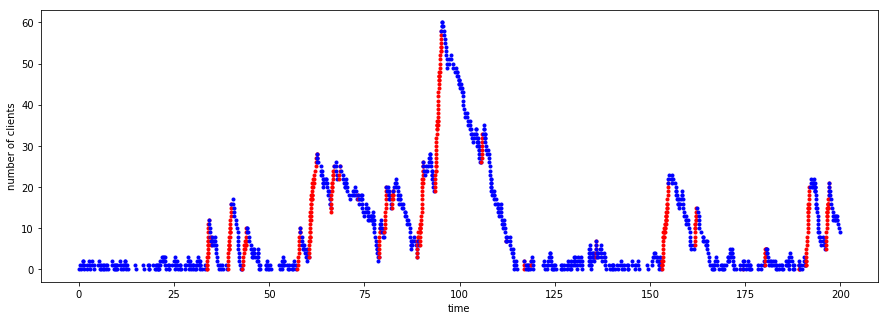

In [3]:
T,X = MMPPM1()

rcParams['figure.figsize'] = 15, 5
for index,t in enumerate(T):
    if X[index][1] == 0:
        plot(t,X[index][0],'b.')
    else:
        plot(t,X[index][0],'r.')
xlabel('time')
ylabel('number of clients')

When $k=1$, the number of users in the system increases rapidly since $\lambda_1>>\mu$. When $k$ returns to 0, the number of users in the system progressively returns to the behavior of a stable $M/M/1$ since $\lambda_0<\mu$.

### **Answer to question 6**


We check that the estimated probability of $PH=1$ is $\dfrac{\alpha_0}{\alpha_0+\alpha_1}$.

In [4]:
T,X = MMPPM1(Tmax=1000) # should be higher, but does not finish executing if too big

P_est = sum((T[1:]-T[:-1])*(X[:-1][:,1]==1))/T[-1]
print(('Estimated probability that $PH=1$ = {0:1.3f}\n'+
       'P(PH=1) = {1:1.3f}')
      .format(P_est,α0/(α0+α1)))

Estimated probability that $PH=1$ = 0.091
P(PH=1) = 0.091


### **Answer to question 7**

The steady state distribution of $PH$ is given by $P(PH=0)=\dfrac{\alpha_1}{\alpha_0+\alpha_1}$ and $P(PH=1)=\dfrac{\alpha_0}{\alpha_0+\alpha_1}$. 

Thus, the average arrival rate is 

$$
\overline{\lambda}=P(PH=0)\lambda_0+P(PH=1)\lambda_1= \dfrac{\alpha_1\lambda_0+\alpha_0\lambda_1}{\alpha_0+\alpha_1}.
$$ 

### **Answer to question 8**

The mean sojourn time of the $M/M/1$ would be $\dfrac{1}{\mu-\overline{\lambda}}= \dfrac{1}{\mu}\dfrac{1}{1-\rho}$, with $\rho=\dfrac{\overline{\lambda}}{\mu}$. 

In [5]:
###########
# supply the mean rate of arrivals in the MMPP/M/1
λm    = (α1 * λ0 + α0 * λ1) / (α0 + α1)
###########

###########
# supply the mean sojourn time for the M/M/1 with arrival rate λm
rho = λm / μ
R_MM1 = 1 / (μ * (1 - rho)) 
###########

#---
V3,V4 = λm, R_MM1
V3,V4

(3.6363636363636362, 0.7333333333333334)

### **Answer to question 9**

In [6]:
def MMPPM1_v2(x0=(0,0),Tmax=200):
    r0 = α0+λ0 # rate of exit from state (0,0)
    r1 = α1+λ1 # rate of exit from state (0,1)
    T  = [0]   # list of instants of events 
               # (arrivals,departures, change of phase)
    X  = [x0]  # initial state of the system, 
               # list of state evolutions
    arrival_times = [-1 for k in range(x0[0])]  # arrival times 
    # of clients in the system; Sojourn times of clients present at t=0 
    # in the system will not be evaluated.
    # Their arrival times are arbitrarily set to -1.
    D  = []    # delays: times spent by users inside the system
    while T[-1]<Tmax:
        n,ph  = X[-1]
        # Probabilities to move up/down/left/right in the transition diagram:
        # given by Pu/Pd/Pl/Pr
        if ph==0: 
            Pu = 0
            if n==0: 
                rate     = r0  # rate of events
                Pl,Pd,Pr = 0,α0/rate,λ0/rate
            else:
                rate     = r0+μ
                Pl,Pd,Pr = μ/rate,α0/rate,λ0/rate
        else: #(ph==1)
            Pd = 0
            if n==0: 
                rate     = r1
                Pl,Pu,Pr = 0,α1/rate,λ1/rate
            else:
                rate     = r1+μ
                Pl,Pu,Pr = μ/rate,α1/rate,λ1/rate
            
        # generating the date of a new change of state
        T     = T + [T[-1]+(-1./rate)*log(rand(1))]
        # generating move
        x     = rand(1)
        entry = 0 # type of change (+1:arrival, -1: departure, 0: change of phase)
        if   x<Pu:             ph-=1  # move up
        elif Pu<x<Pu+Pd:       ph+=1  # move down
        elif Pu+Pd<x<Pu+Pd+Pl:        # move left
            n    -= 1  
            entry = -1                # departure
        else:                         # move right
            n    += 1  
            entry = 1                 # arrival
        X   = X +[(n,ph)]
        #-------- New part of the code ----------------------
        #  (see also part 2 of lab 1)
        if entry == 1: # arrival
            # the time of entering client is recorded in 
            # the arrival_times FIFO (First In - First Out) stack:
            arrival_times.append(T[-1])
        elif entry == -1: # departure
            # arrival time T_in of the client going out of the system.
            # T_in is extracted from the arrival_times FIFO stack:
            T_in = arrival_times.pop(0)
            ############################################
            # if the client entered the system after t=0
            # (T_in>0), we add the time he spent in the sytem 
            # to delays list 
            if T_in>0:
                D.append(T[-1] - T_in)
            ############################################
        #-----------------------------------------------------
        
    T    = array(T[:-1]) # event after Tmax is discarded
    X    = array(X[:-1])   
    return T,X,D

In [7]:
T,X,D = MMPPM1_v2(Tmax=200)

In [8]:
mean(D)

3.7417091945479077

In [9]:
import IPython.core.display as disp

disp.display_latex(r'Mean delay for $M/M/1$ with arrivals at rate '
                +r'$\overline{\lambda}=1/(\mu-\overline{\lambda})$'
                +'={0:.2f}'.format(R_MM1),raw=True)
####################
# Supply the estimated value for the mean sojourn time
# in the MMPP/M/1
R_MMMPPM1 = mean(D)
####################
disp.display_latex('Mean delay for $MMPP/M/1$ = {0:.3f}'
                   .format(R_MMMPPM1),raw=True)
#----
V5 = R_MMMPPM1

We note that the mean sojourn time is much higher with the $MMPP/M/1$ than with the corresponding $M/M/1$. This is because with the $MMPP/M/1$ clients arriving when $\lambda(t)=\lambda_1$ are likely to wait for long before being served. This corresponds to every day life where we experience longer waiting at a desk where most people arrive during short periods of time (the period during which we generally also arrive ourselves) than at a desk where people arrive at regular rate, despite the fact that at the end of the day both desks will have served the same number of clients.

# Conclusion

In this part of the lab we have seen that for non Poisson arrival process more complex arrival mechanisms sometimes boil down to time continuous Markov chains via MMPP model represention. Note that the same would also apply to describe some service processes.

As far as simulation is concerned, we have seen that the code used to simulate the $MMPP/M/1$ can be derived by adapting the one developped for the $M/M/1$ in the lab of the second week.
In the lab of the next week, we will continue enriching our simulation toolbox by simulating multiserver systems.

----------------------------------

### Note

We did not study the stationary distribution $MMPP/M/1$ queue that is a bit more complex than the targeted level of this course. However, for interested readers with enough background in matrix computation, let us note that the generator matrix ${\bf \tilde{Q}}$ of the $MMPP/M/1$ can be defined with entry $[{\bf \tilde{Q}}]_{2n+ph,2n'+ph'}$ representing the transition rate from state $(n,ph)$ to state $(n',ph')$. This amounts to class states $(n,ph)$ in ${\bf \tilde{Q}}$ with lexicographical order. Then, it can be checked that ${\bf \tilde{Q}}$ is made of $2\times 2$ matrix blocks. More specificaly, ${\bf \tilde{Q}}$ is block tridiagonal, with blocks in the form

$$
{\bf \tilde{Q}} =
\begin{pmatrix}
{\bf D_0} & {\bf U_1} &&& \\
{\bf L_1}      & {\bf D_1} & {\bf U_1} && \\
         & {\bf L_1}             & {\bf D_1} & {\bf U_1} & \\
         &                 & \ddots       & \ddots & \ddots
\end{pmatrix}
$$

and diagonal, upper and lower blocks given by

$$
{\bf D_0} =
\begin{pmatrix}
-(\alpha_0+\lambda_0) & \alpha_0 \\
\alpha_1 & -(\alpha_1+\lambda_1)
\end{pmatrix}
,\quad
{\bf D_1} =
\begin{pmatrix}
-(\alpha_0+\lambda_0+\mu) & \alpha_0 \\
\alpha_1 & -(\alpha_1+\lambda_1+\mu)
\end{pmatrix}
,\quad\\
{\bf U_1} =
\begin{pmatrix}
\lambda_0 & 0 \\
0 & \lambda_1
\end{pmatrix}
,\quad
{\bf L_1} =
\begin{pmatrix}
\mu & 0 \\
0 & \mu
\end{pmatrix}.
$$

Then, letting 

$$
(x_0,x_1,\ldots,x_n,\ldots)=(\pi_{(0,0)},\pi_{(0,1)},\pi_{(1,0)},\pi_{(1,1)},\ldots,\pi_{(n,0)},\pi_{(n,1)},\ldots)
$$ 

denote the steady state distribution of the system, where $x_n=(\pi_{(n,0)},\pi_{(n,1)})$, it comes that

$$
\begin{array}{lrl}
    &x_0{\bf D_0}+x_1{\bf L_1} &=0\\
n>0:&x_{n-1}{\bf U_1}+x_n{\bf D_1}+x_{n+1}{\bf L_1}&=0.
\end{array}
$$

The solution of this problem resorts to solving a matrix difference equation problem (https://en.wikipedia.org/wiki/Matrix_difference_equation) and is (in general) in the form $x_n=x_0{\bf R}^n$, where ${\bf R}$ satisfies equations ${\bf D_0}+{\bf R L_1} =0$ and ${\bf U_1}+{\bf R D_1}+{\bf R^2L_1}=0$ and $x_0({\bf I-R})^{-1}\begin{pmatrix}1\\1\end{pmatrix}$=1 (which expresses the normalization condition $\sum_{k=0,1;n\geq 0}\pi_{(k,n)}=1$). However, this is beyond the scope of the MOOC. 

# Your answers for this notebook

In [10]:
print("---------------------------------------------------\n"
      +"VALIDITY OF RESULTS SUPPLIED FOR WEEK IV - Part II:\n"
      +"---------------------------------------------------")
results  = dict()
for k in range(1,6):
    results["V"+str(k)] = "NO"
    
try: 
    if abs(V1-2.2)<.0001:  results["V1"] =  "OK"
except: pass
try: 
    if abs(V2-22.)<.0001:  results["V2"] =  "OK"
except: pass
try: 
    if abs(V3-3.636)<.001: results["V3"] =  "OK"
except: pass
try: 
    if abs(V4-.733)<.001:  results["V4"] =  "OK"
except: pass
try: 
    if V5>1:               results["V5"] =  "OK"
except: pass

for key,val in results.items():
    print(key,': ',val)

---------------------------------------------------
VALIDITY OF RESULTS SUPPLIED FOR WEEK IV - Part II:
---------------------------------------------------
V1 :  OK
V2 :  OK
V3 :  OK
V4 :  OK
V5 :  OK
